Part 1: Understanding Regularization
Q- What is regularization in the context of deep learning? Why is it important.

Regularization in the context of deep learning is a technique used to prevent overfitting, a common problem where a model becomes too specialized to the training data and performs poorly on new data. It involves adding a penalty term to the loss function during training to discourage complex or over-reliant model behaviors. Regularization methods, such as L1 and L2 regularization, encourage the model to learn simpler and more generalized patterns, reducing the risk of overfitting. By doing so, regularization helps improve the model's ability to perform well on unseen data and enhances its generalization capabilities, making it an essential tool to achieve better and more robust deep learning models.


Q- Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff.

The bias-variance tradeoff is a key challenge in deep learning, involving a balance between bias and variance errors. High bias occurs when a model is too simplistic and fails to capture complex patterns, leading to underfitting. High variance arises when a model is too complex and fits the noise in the training data, causing overfitting.

Regularization helps address this tradeoff by adding penalty terms to the loss function during training. In deep learning, popular regularization techniques like L1 and L2 regularization limit the model's complexity and discourage the over-reliance on specific features. This reduces variance and prevents overfitting, making the model more robust and better at generalizing to unseen data. By controlling the model's capacity, regularization helps strike a balance between bias and variance, leading to improved performance on both the training and testing datasets.


Q- Describe the concept of L1 and L2 regularization. How do they differ in terms of penalty calculation and their effects on the model.

L1 regularization, also known as Lasso regularization, adds a penalty to the loss function based on the absolute values of the model's weights. It encourages sparsity, as it tends to shrink less important features' weights to zero, effectively excluding them from the model. This results in feature selection and a more interpretable model.

L2 regularization, also known as Ridge regularization, adds a penalty based on the squared magnitudes of the model's weights. It encourages the model to distribute the weights more evenly across all features, effectively reducing their impact but rarely setting them to exactly zero.


Q- Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.

Regularization plays a crucial role in preventing overfitting and improving the generalization of deep learning models. Overfitting occurs when models become overly complex, fitting noise in the training data and performing poorly on unseen data. By adding regularization techniques such as L1 or L2 regularization during training, the models are penalized for excessive complexity, encouraging them to focus on more relevant patterns in the data. This prevents overfitting and promotes better generalization to new, unseen data. Regularization effectively constrains model behavior, striking a balance between bias and variance errors, leading to more robust and reliable deep learning models.


Part 2: Regularization Technique􏰂


Q- Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference.

Dropout regularization is a technique used to reduce overfitting in deep learning models. During training, Dropout randomly deactivates a fraction of neurons in a layer with a specified probability. This prevents neurons from relying too heavily on each other and promotes more robust feature learning. During inference, all neurons are active, but their outputs are scaled by the dropout probability to maintain the expected values.

Dropout effectively introduces noise into the learning process, making the model more resilient and preventing it from becoming overly dependent on specific neurons. This reduces overfitting and improves generalization by encouraging the model to learn more diverse and independent features.



Q- Describe the concept of Early Stopping as a form of regularization. How does it help prevent overfitting during the training process.

Early stopping is a form of regularization used to prevent overfitting during the training process of machine learning models, including deep learning models. It involves monitoring the model's performance on a validation set during training and stopping the training process when the performance on the validation set starts to degrade.

As the model trains, it may continue to improve its performance on the training data but may start to overfit and perform poorly on the validation data. Early stopping prevents the model from reaching a point of overfitting by stopping the training at an earlier stage, where it exhibits the best generalization performance on the validation set. By doing so, early stopping helps the model to avoid memorizing noise and focus on learning more relevant and transferable patterns, thus improving its ability to generalize to new, unseen data.


Q- Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting?
   
Batch Normalization is a technique used in deep learning to improve the stability and convergence of neural networks. It involves normalizing the activations of each layer within a mini-batch during training. This normalizing step helps mitigate the internal covariate shift problem and ensures more stable updates during gradient descent.

While Batch Normalization is primarily used for improving training efficiency, it indirectly acts as a form of regularization. By reducing internal covariate shift, it helps prevent neurons from becoming overly sensitive to the specific distribution of the training data, reducing the risk of overfitting. This regularization effect leads to better generalization and more robust deep learning models.


Part 3: Applying Regularizatio


Q- Implement Dropout regularization in a deep learning model using a framework of your choice. Evaluate its impact on model performance and compare it with a model without Dropout

In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from tensorflow.keras import models, layers
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


2023-07-22 14:56:08.502100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.12.0
Keras version: 2.12.0


In [2]:
df = pd.read_csv('wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,855
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,NaN


there is no catogrical variable

In [5]:
df['quality'] = df['quality'].replace({'good': 1, 'bad': 0})

X = df.drop('quality', axis=1)
y= df.quality

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test,X_val,y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [7]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
y_train = np.array(y_train).reshape(-1, 1)
y_val = np.array(y_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1,1)

X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [9]:

from tensorflow.keras.callbacks import  EarlyStopping
import datetime



early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)


model = models.Sequential()
model.add(layers.Dense(64,   kernel_initializer='he_normal',activation='relu'))
model.add(layers.Dense(64,   kernel_initializer='he_normal',activation='relu'))
model.add(layers.Dense(64*2, kernel_initializer='he_normal',activation='relu'))
model.add(layers.Dense(64,   kernel_initializer='he_normal',activation='relu'))
model.add(layers.Dense(64/2, kernel_initializer='he_normal',activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val),callbacks=[early_stopping_callback])


model.summary()



Epoch 1/20
10/10 [==============================] - 2s 27ms/step - loss: 0.6258 - accuracy: 0.6552 - val_loss: 0.5139 - val_accuracy: 0.7812
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5274 - accuracy: 0.7349 - val_loss: 0.4596 - val_accuracy: 0.7969
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4977 - accuracy: 0.7584 - val_loss: 0.4562 - val_accuracy: 0.7812
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4776 - accuracy: 0.7600 - val_loss: 0.4654 - val_accuracy: 0.7656
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.4631 - accuracy: 0.7717 - val_loss: 0.4529 - val_accuracy: 0.7656
Epoch 6/20
10/10 [==============================] - 0s 6ms/step - loss: 0.4498 - accuracy: 0.7819 - val_loss: 0.4616 - val_accuracy: 0.7656
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4443 - accuracy: 0.7826 - val_loss: 0.4754 - val_accuracy: 0.7656
Epoch 8/20
10/10 [=

In [10]:
model_params = model.get_weights()

for layer_weights in model_params:
    print(layer_weights.shape)  # Print the shape of the layer's weights



(11, 64)
(64,)
(64, 64)
(64,)
(64, 128)
(128,)
(128, 64)
(64,)
(64, 32)
(32,)
(32, 1)
(1,)


In [11]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.625776,0.655199,0.513938,0.781250
1,0.527397,0.734949,0.459553,0.796875
2,0.497716,0.758405,0.456222,0.781250
3,0.477609,0.759969,0.465428,0.765625
4,0.463118,0.771697,0.452923,0.765625
5,0.449775,0.781861,0.461595,0.765625
6,0.444292,0.782643,0.475432,0.765625
7,0.423691,0.806099,0.459693,0.796875


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


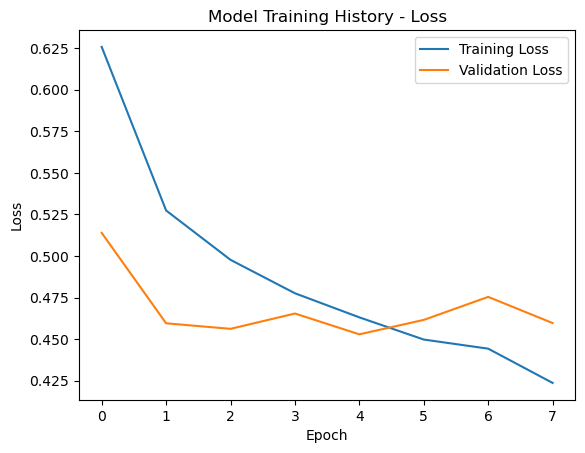

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training and validation loss
ax.plot(train_loss, label='Training Loss')
ax.plot(val_loss, label='Validation Loss')

# Set the plot title and labels
ax.set_title('Model Training History - Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

# Add a legend
ax.legend()

# Show the plot
plt.show()


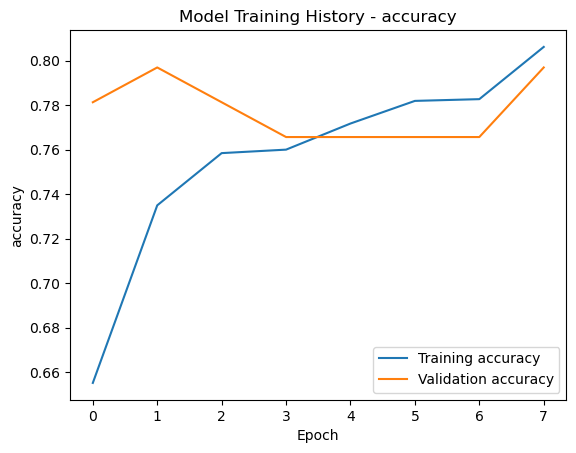

In [14]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the training and validation loss
ax.plot(train_loss, label='Training accuracy')
ax.plot(val_loss, label='Validation accuracy')

# Set the plot title and labels
ax.set_title('Model Training History - accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('accuracy')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [15]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


8/8 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7539
Test Loss: 0.5007074475288391
Test Accuracy: 0.75390625


Epoch 1/20
10/10 [==============================] - 2s 24ms/step - loss: 0.6826 - accuracy: 0.6059 - val_loss: 0.5797 - val_accuracy: 0.6719
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5420 - accuracy: 0.7451 - val_loss: 0.5137 - val_accuracy: 0.7344
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5183 - accuracy: 0.7467 - val_loss: 0.4842 - val_accuracy: 0.7656
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5090 - accuracy: 0.7553 - val_loss: 0.4778 - val_accuracy: 0.7812
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4844 - accuracy: 0.7670 - val_loss: 0.4869 - val_accuracy: 0.7500
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4794 - accuracy: 0.7701 - val_loss: 0.4645 - val_accuracy: 0.7656
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4580 - accuracy: 0.7905 - val_loss: 0.4612 - val_accuracy: 0.7500
Epoch 8/20
10/10 [=

Epoch 3/20
10/10 [==============================] - 0s 19ms/step - loss: 0.6976 - accuracy: 0.5192 - val_loss: 0.6897 - val_accuracy: 0.5938
Epoch 4/20
10/10 [==============================] - 0s 20ms/step - loss: 0.6930 - accuracy: 0.5215 - val_loss: 0.6908 - val_accuracy: 0.5938
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 0.6916 - accuracy: 0.5508
Epoch 1/20
10/10 [==============================] - 10s 87ms/step - loss: 0.8342 - accuracy: 0.4949 - val_loss: 0.7448 - val_accuracy: 0.4062
Epoch 2/20
10/10 [==============================] - 0s 21ms/step - loss: 0.7306 - accuracy: 0.5129 - val_loss: 0.7135 - val_accuracy: 0.4062
Epoch 3/20
10/10 [==============================] - 0s 22ms/step - loss: 0.7259 - accuracy: 0.4988 - val_loss: 0.6999 - val_accuracy: 0.4062
Epoch 4/20
10/10 [==============================] - 0s 22ms/step - loss: 0.7020 - accuracy: 0.5098 - val_loss: 0.6953 - val_accuracy: 0.4062
Epoch 5/20
10/10 [==============================] - 0s 2

TypeError: float() argument must be a string or a real number, not 'dict'

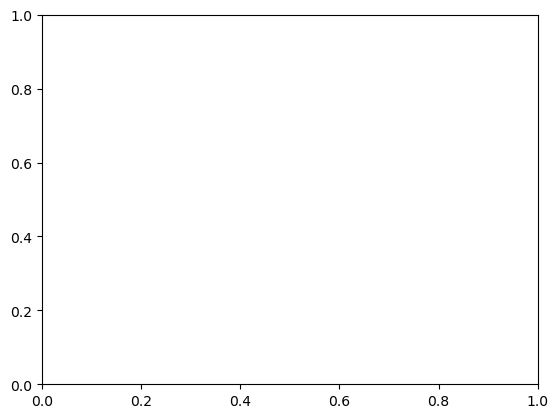

In [31]:
model2 = models.Sequential()
lis = [.01,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5]
test_acc ={}
for dropout_rate in lis:
    model2.add(layers.Dense(64,   kernel_initializer='he_normal',activation='relu'))
    model2.add(layers.Dropout(dropout_rate))
    model2.add(layers.Dense(64,   kernel_initializer='he_normal',activation='relu'))
    model2.add(layers.Dropout(dropout_rate))
    model2.add(layers.Dense(64*2, kernel_initializer='he_normal',activation='relu'))
    model2.add(layers.Dropout(dropout_rate))
    model2.add(layers.Dense(64,   kernel_initializer='he_normal',activation='relu'))
    model2.add(layers.Dropout(dropout_rate))
    model2.add(layers.Dense(64/2, kernel_initializer='he_normal',activation='relu'))
    model2.add(layers.Dense(1, activation='sigmoid'))

    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



    history = model2.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val),callbacks=[early_stopping_callback])


#     model2.summary()
    test_loss, test_accuracy = model2.evaluate(X_test, y_test)
    test_acc[dropout_rate]= test_accuracy
#     print("Test Accuracy:", test_accuracy)
plt.plot(test_acc)

In [28]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7227
Test Loss: 0.542188286781311
Test Accuracy: 0.72265625


In [32]:
test_acc

{0.01: 0.7734375,
 0.05: 0.76953125,
 0.1: 0.77734375,
 0.15: 0.74609375,
 0.2: 0.7265625,
 0.25: 0.7109375,
 0.3: 0.55078125,
 0.35: 0.55078125,
 0.4: 0.55078125,
 0.45: 0.55078125,
 0.5: 0.55078125}

hence it is clear that test accuracy increase for drop rate lies between 0.01 to .1.

Q:- Discuss the considerations and tradeoffs when choosing the appropriate regularization technique for a
given deep learning task.

Task Complexity: The complexity of the task and the size of the dataset play a role. For smaller datasets and simpler tasks, simpler regularization techniques like L2 regularization or early stopping may suffice.

Model Architecture: Different regularization techniques may suit specific architectures differently. For example, Batch Normalization can be beneficial for deep networks, while Dropout might work well with shallower networks.

Interpretability: Some regularization methods, like L1 regularization, lead to more interpretable models by encouraging sparsity, while others may add complexity to the model.

Training Time: Some regularization techniques may slow down the training process, especially when applied excessively. Finding the right balance between regularization strength and training time is crucial.

Generalization Performance: The primary goal is to improve generalization and avoid overfitting. Regularization methods that effectively achieve this on the validation/test data should be preferred.

Empirical Evaluation: It's essential to experiment with various regularization techniques and hyperparameters to determine the best fit for the specific deep learning task. Cross-validation can help assess their impact on model performance.

Domain Knowledge: Understanding the problem domain can guide the selection of suitable regularization methods based on prior knowledge about the data and potential sources of overfitting.

Balancing these factors will aid in selecting the most appropriate regularization technique, leading to improved model performance and generalization on unseen data.






